In [1]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
end
include("/home/sergey/work/repo/dynamical-systems/system.jl")
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie, JLD2

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


In [2]:
function get_u0(x1, y1, x2, y2)
    z = y1 - y2
    return SVector{5}([x1, y1, x2, y2, z])
end

get_u0 (generic function with 1 method)

In [214]:
#=
parameters[3] = 0.02
parameters[7] = 0.004
parameters[8] = 0.1
=#
cycle = SVector(-1.5075165133121957, -0.34359566282900644, 1.793741761693626, -0.12487391025344946, -0.218721752575605140)

5-element SVector{5, Float64} with indices SOneTo(5):
 -1.5075165133121957
 -0.34359566282900644
  1.793741761693626
 -0.12487391025344946
 -0.21872175257560514

In [10]:
Λs = load("/home/sergey/MEGA/dynamical-systems/FHN_Korotkov/data/maps_LSE/g=0.015_change_k1_k2/LSE_300x300_k_1_k_2.jld2")["λs"]
u0s = load("/home/sergey/MEGA/dynamical-systems/FHN_Korotkov/data/maps_LSE/g=0.015_change_k1_k2/u0s_300x300_k_1_k_2.jld2")

Dict{String, Any} with 2 entries:
  "init_points" => [1.90757 -1.07981 … -1.04303 -1.04904; -1.07981 -1.65122 … -…
  "last_points" => [-1.07981 -1.65122 … -1.04904 1.57659; -1.0222 -0.952439 … -…

In [11]:
init_points = u0s["init_points"]
last_points = u0s["last_points"]

300×300×5 Array{Float64, 3}:
[:, :, 1] =
 -1.07981   -1.65122   -0.984317  …  -1.04303   -1.04904    1.57659
 -1.0222    -0.952439  -1.77611      -0.981273  -1.01659   -0.992119
 -1.57174   -1.12189    1.38143      -1.0462    -1.01556   -1.24575
 -1.02399   -1.04468   -1.00386      -1.04336    1.73538   -0.96451
 -1.86027   -0.972296  -1.63588      -1.69601   -1.25596    1.33851
 -1.82501   -0.979687  -1.04109   …  -1.00893   -0.858659  -1.00526
 -0.931297  -1.01063   -1.03113      -1.04666   -0.981096  -2.0077
 -1.0333    -1.00341   -0.964407     -0.992919  -1.00265   -0.995821
 -0.972045  -0.972387  -1.9151       -1.04368   -1.36028    1.24815
 -0.998771  -1.05662   -0.962821     -1.59402   -0.992667  -1.822
  ⋮                               ⋱                        
 -1.01      -1.01      -1.01         -1.01      -1.01      -1.01
 -1.01      -1.01      -1.01         -1.01      -1.01      -1.01
 -1.01      -1.01      -1.01         -1.01      -1.01      -1.01
 -1.01      -1.01      -1

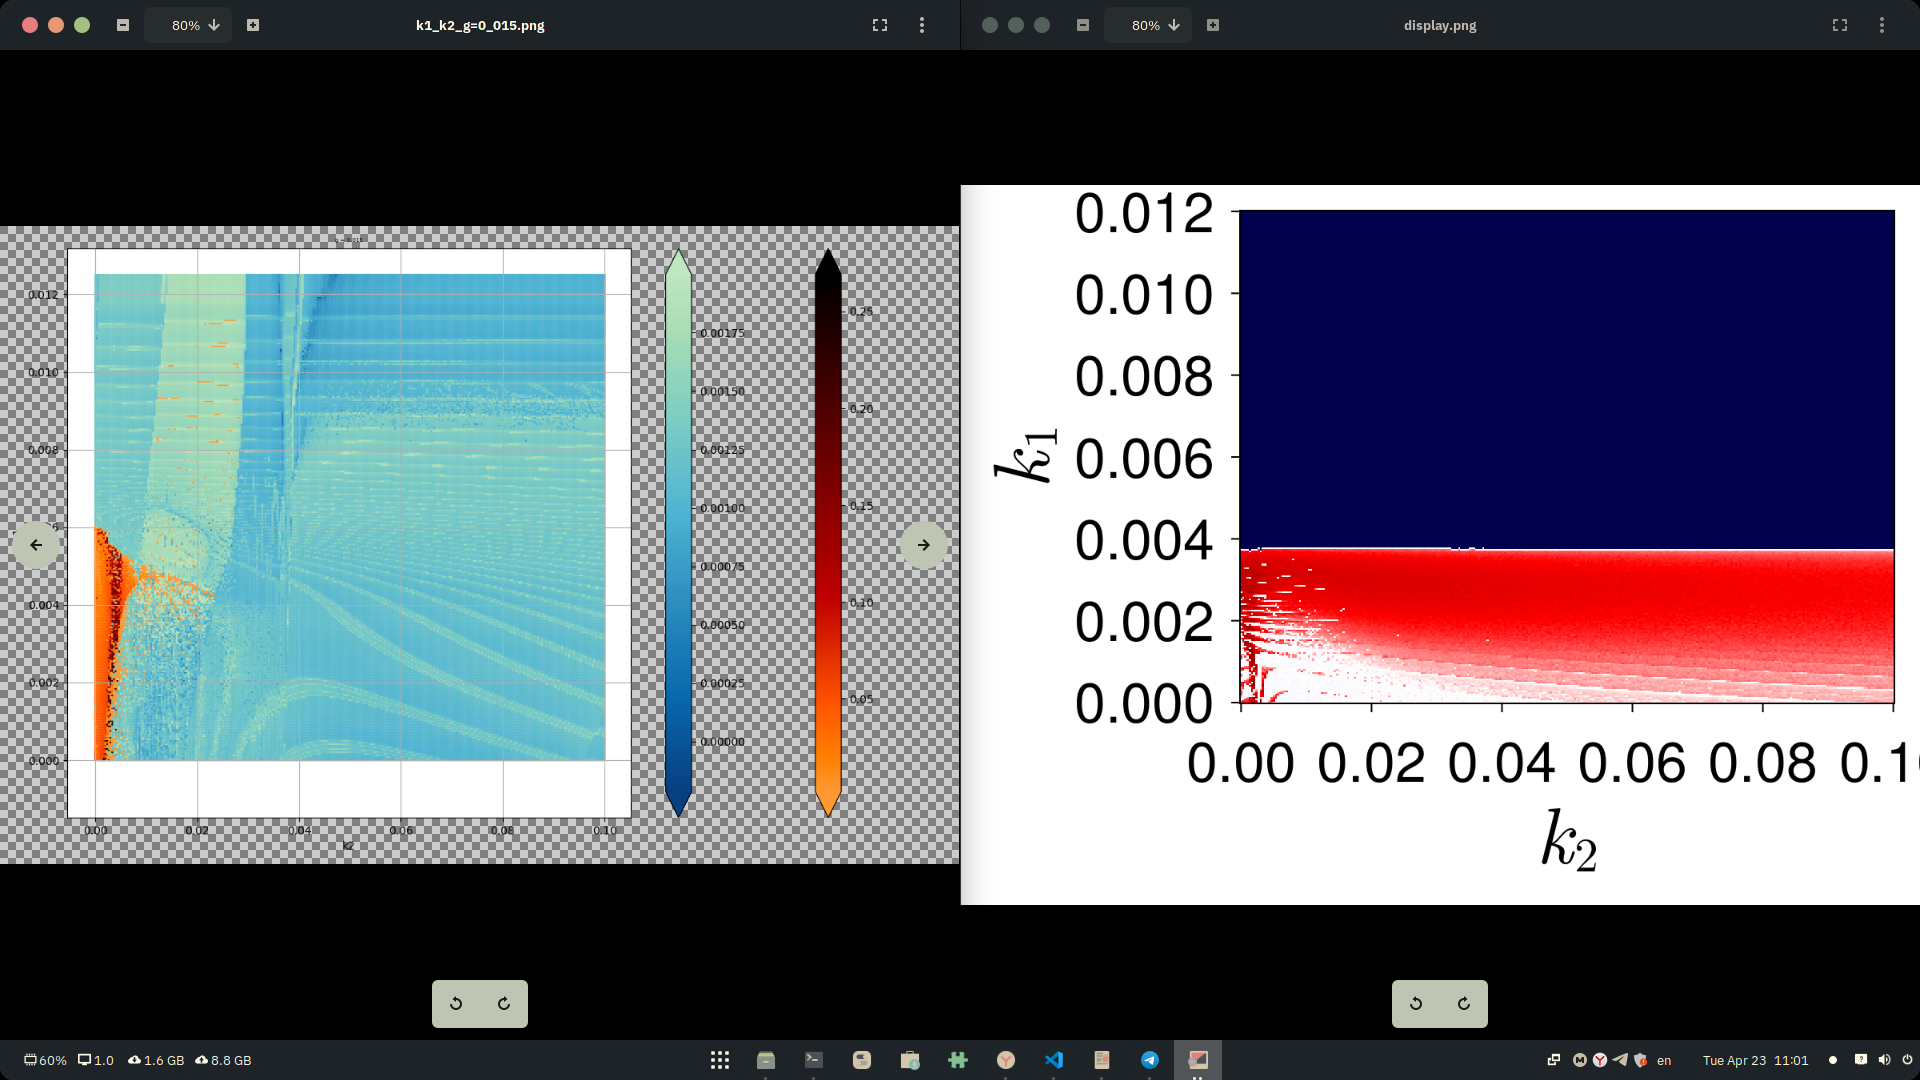

In [12]:
length_range = 300;
range_parameter_1 = range( 0.0, 0.012, length = length_range);
range_parameter_2 = range(0.0, 0.10, length = length_range);

In [126]:
index_k1 = 60
index_k2 = 16
println("k1: $(range_parameter_1[index_k1])")
println("k2: $(range_parameter_2[index_k2])")
println("u0: $(init_points[index_k1, index_k2, :])")
println("u0: $(last_points[index_k1, index_k2, :])")
println("LSE: $(Λs[index_k1, index_k2, :])")

k1: 0.002367892976588629
k2: 0.005016722408026756
u0: [-0.9874559902056247, -0.6647375139885806, -1.0342222902359801, -0.6619846338910619, -0.002752880097024484]
u0: [-1.01277672548365, -0.6664463567466812, -1.0096635882249216, -0.6573931909997901, -0.009053165746387976]
LSE: [0.0005721677357446616, -2.2753811556133427e-6, -0.47654145725185887, -Inf, -Inf]


In [2]:
parameters = FHN2_try3_params()
tspan = (0.0, 10000.0)
parameters[3] = 0.1
parameters[7] = 0.09
parameters[8] = 0.0

u0 =  [-1.0100000004310659, -0.6633274707599297, -1.0099999995689248, -0.663327470943301, 1.8386823010742107e-10]
#init_points[index_k1, index_k2, :]
#[-0.9869622069384711, -0.6599611966759774, -1.0269794646398456, -0.665286936073541, 0.005325739399007164] 
#

u0 = SVector{5}(u0)
prob = ODEProblem(FHN2_try3, u0, tspan, parameters)
sol = solve(prob, Vern9(), adaptive = true, abstol = 1e-9, reltol  = 1e-9); sol

retcode: Success
Interpolation: specialized 9th order lazy interpolation
t: 487116-element Vector{Float64}:
     0.0
     0.030776135190663963
     0.050398467555053325
     0.07951362630049838
     0.10767452640250613
     0.14423487182762176
     0.18002134418847804
     0.21435475171391047
     0.2456493487967746
     0.27477440095031813
     ⋮
  9999.954017648519
  9999.95992153722
  9999.965900254409
  9999.971957566204
  9999.978097345478
  9999.984323464285
  9999.99063960084
  9999.997048878522
 10000.0
u: 487116-element Vector{SVector{5, Float64}}:
 [-1.0100000004310659, -0.6633274707599297, -1.0099999995689248, -0.663327470943301, 1.8386823010742107e-10]
 [-0.9658338116814986, -0.6625954992100712, -0.9658338101312924, -0.662595499356414, 1.4683968833548704e-10]
 [-0.945212301876947, -0.661520413331413, -0.9452122998608804, -0.6615204134428134, 1.1189728728400797e-10]
 [-0.9197403467860816, -0.6592520678166668, -0.9197403440101688, -0.6592520678585501, 4.2380167548066454e-11]


In [215]:
ds = CoupledODEs(FHN2_try3, sol[end], parameters,
diffeq = ( alg = Vern9(), adaptive = true, abstol = 1e-9, reltol  = 1e-9));
LLE = lyapunovspectrum(ds, 5000)

5-element Vector{Float64}:
   0.16025276623291373
   0.00049818115247443
  -0.0006005838329761961
 -Inf
 -Inf

In [6]:
function get_percent(number, percent)
    return floor(Int64, (number / 100) * percent )
end

get_percent (generic function with 1 method)

In [7]:
indexx, indexy, indexz = 1, 3, 4

ticksize = 25
labelsize = 40
lw = 1.0
colorline = :deeppink

:deeppink

In [212]:
soltimeseries = sol
len_sol = length(sol)

tstart = get_percent( len_sol, 70); tend = len_sol

f = Figure(size = (1400, 350))
ax = Axis(f[1,1], xlabel = L"time", ylabel = L"x_i", xlabelsize = labelsize, ylabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, xgridvisible = false, ygridvisible = false)

lines!(ax, soltimeseries.t[floor(Int64, ted1/2):tend], soltimeseries[indexx, floor(Int64, ted1/2):tend], color = :red, linewidth = lw)
lines!(ax, soltimeseries.t[floor(Int64, ted1/2):tend], soltimeseries[indexy, floor(Int64, ted1/2):tend], color = :green, linewidth = lw)

display(f)

ArgumentError: ArgumentError: `stack` on an empty collection is not allowed

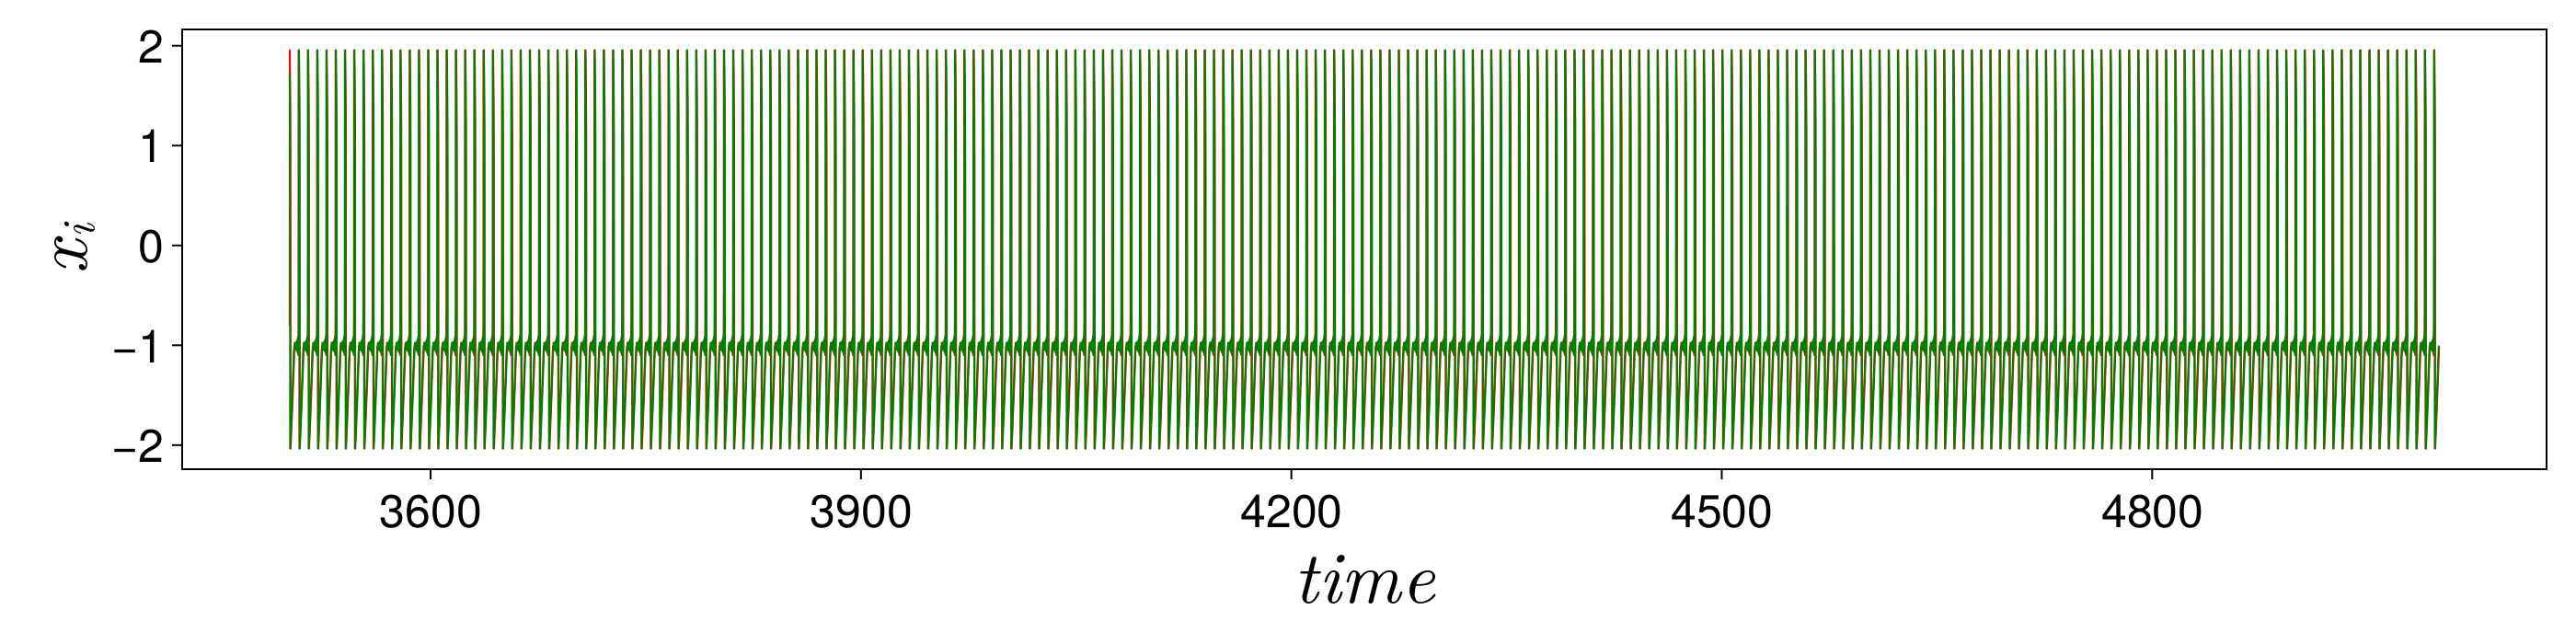

CairoMakie.Screen{IMAGE}


In [131]:
soltimeseries = sol
len_sol = length(sol)

tstart = get_percent( len_sol, 70); tend = len_sol

f = Figure(size = (1400, 350))
ax = Axis(f[1,1], xlabel = L"time", ylabel = L"x_i", xlabelsize = labelsize, ylabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, xgridvisible = false, ygridvisible = false)

lines!(ax, soltimeseries.t[tstart:tend], soltimeseries[indexx, tstart:tend], color = :red, linewidth = lw)
lines!(ax, soltimeseries.t[tstart:tend], soltimeseries[indexy, tstart:tend], color = :green, linewidth = lw)

display(f)

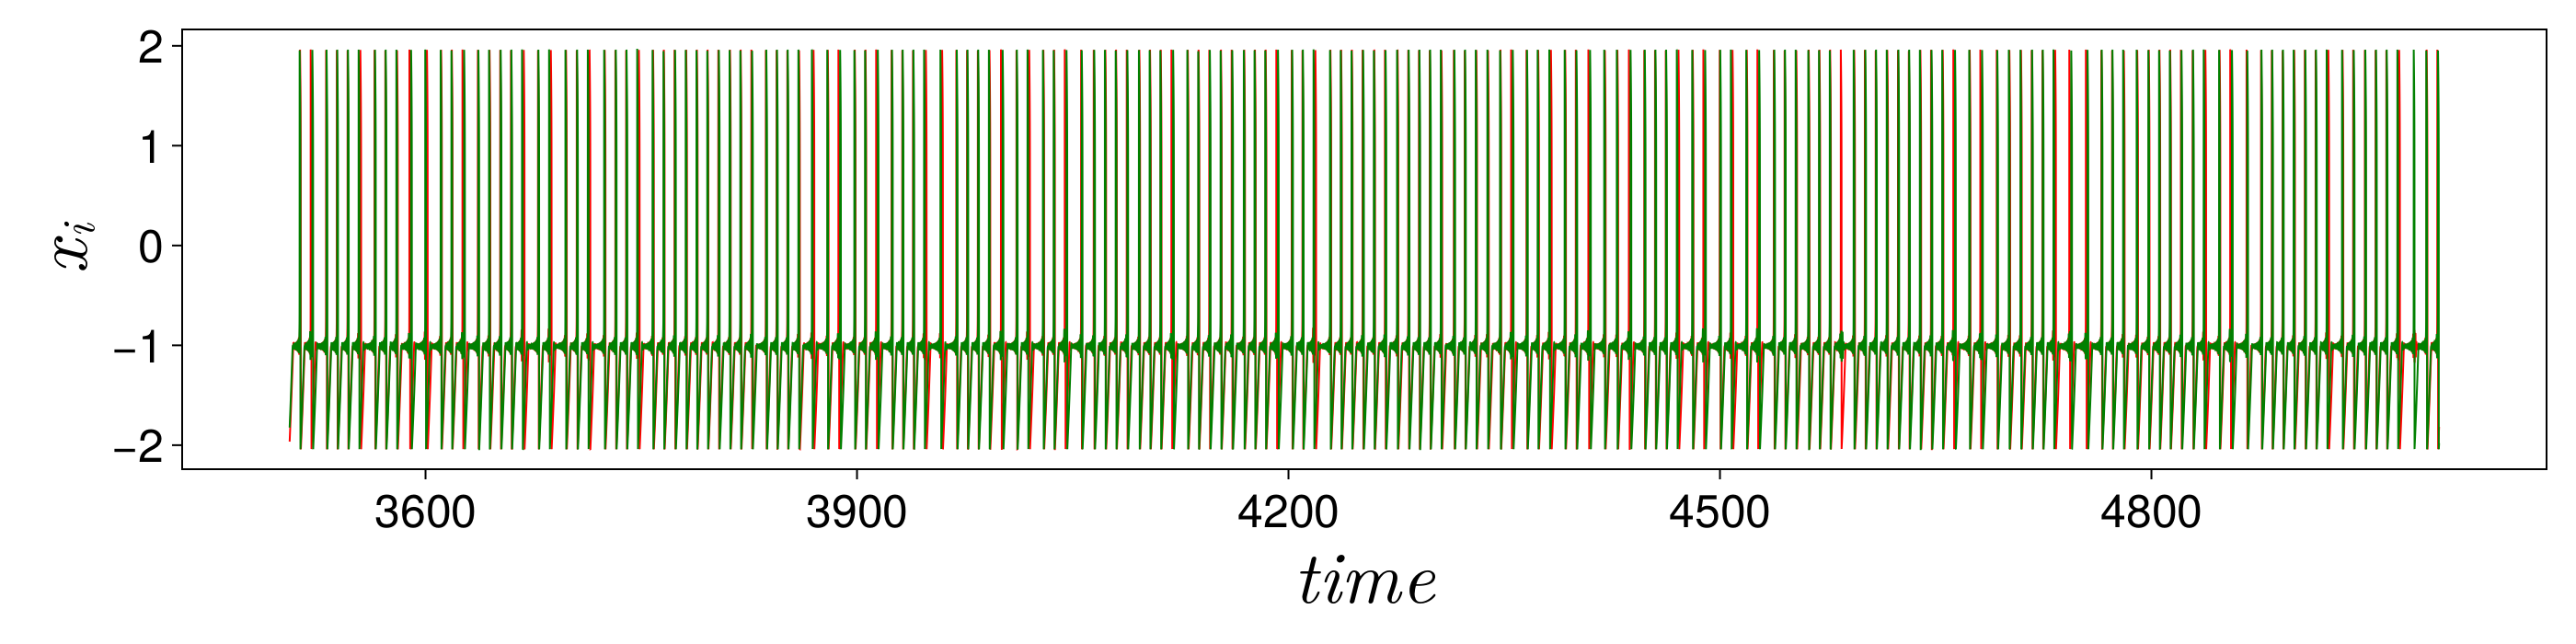

CairoMakie.Screen{IMAGE}


In [105]:
soltimeseries = sol
len_sol = length(sol)

tstart = get_percent( len_sol, 70); tend = len_sol

f = Figure(size = (1400, 350))
ax = Axis(f[1,1], xlabel = L"time", ylabel = L"x_i", xlabelsize = labelsize, ylabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, xgridvisible = false, ygridvisible = false)

lines!(ax, soltimeseries.t[tstart:tend], soltimeseries[indexx, tstart:tend], color = :red, linewidth = lw)
lines!(ax, soltimeseries.t[tstart:tend], soltimeseries[indexy, tstart:tend], color = :green, linewidth = lw)

display(f)

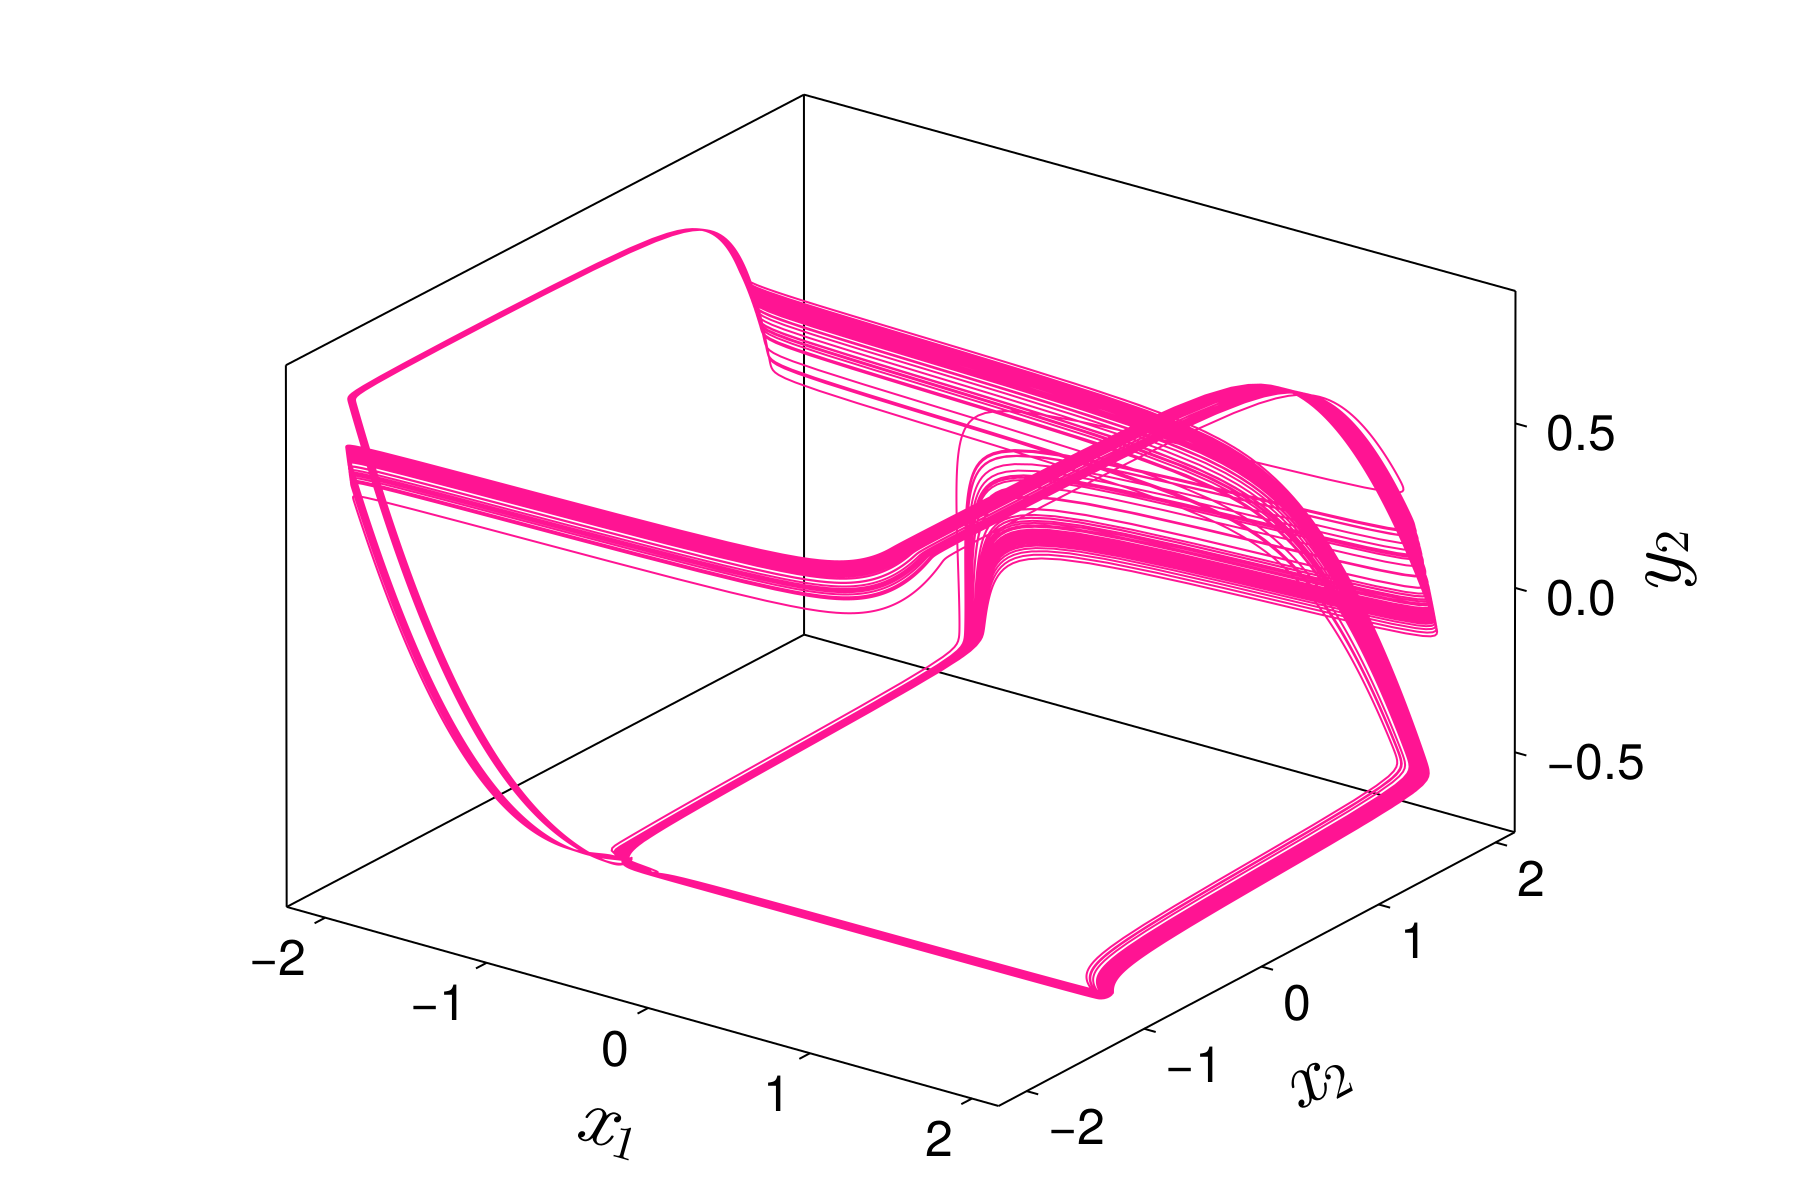

CairoMakie.Screen{IMAGE}


In [208]:
indexx, indexy, indexz = 1, 3, 4
az = -0.3pi
f = Figure(size = (900, 600))
ax3d = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"x_2", zlabel = L"y_2", xlabelsize = labelsize, ylabelsize = labelsize, zlabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
    azimuth = az, xgridvisible = false, ygridvisible = false, zgridvisible = false)

tst1 = get_percent( len_sol, 99)
ted1 = len_sol
lines!(ax3d, sol[indexx, floor(Int64, ted1/2):ted1],
 sol[indexy, floor(Int64, ted1/2):ted1],
  sol[indexz, floor(Int64, ted1/2):ted1], linewidth = lw, color = colorline)

display(f)

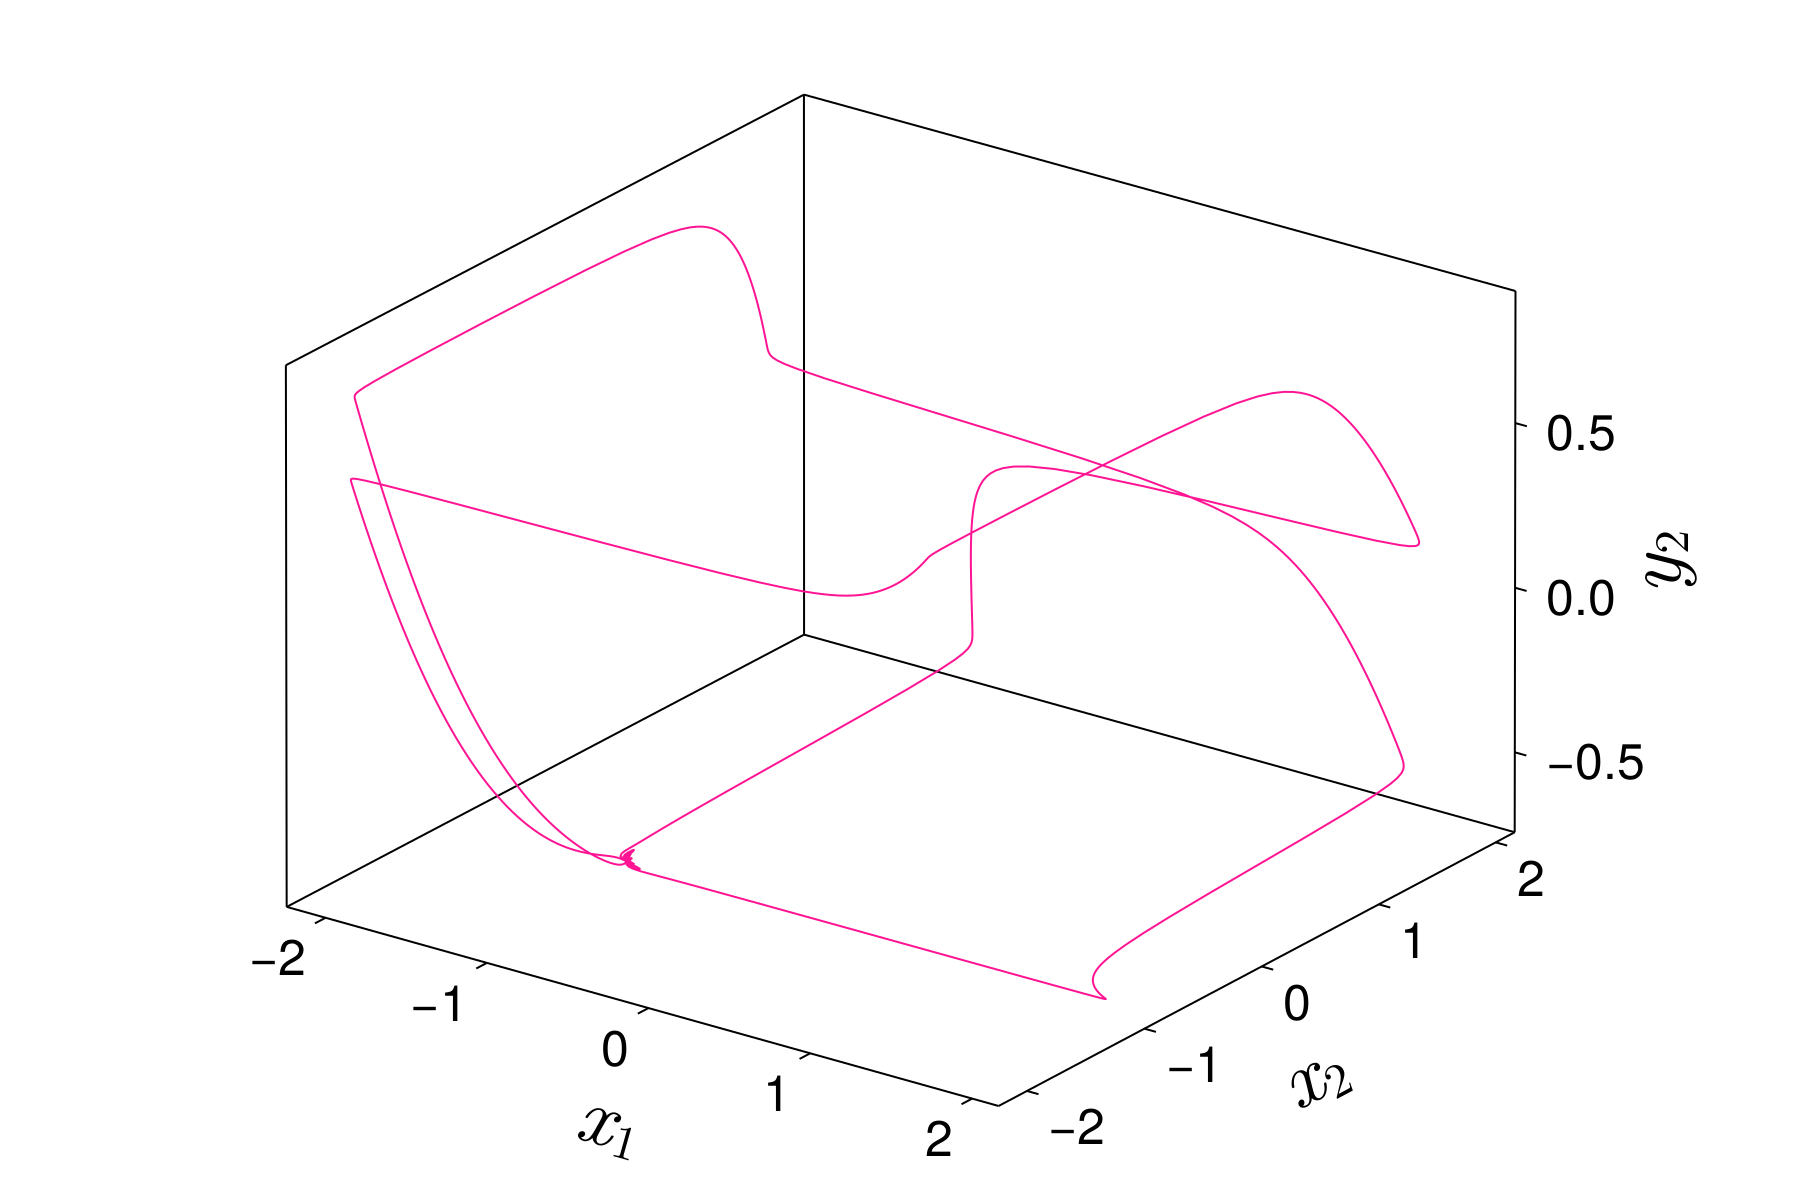

CairoMakie.Screen{IMAGE}


In [132]:
indexx, indexy, indexz = 1, 3, 4
az = -0.3pi
f = Figure(size = (900, 600))
ax3d = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"x_2", zlabel = L"y_2", xlabelsize = labelsize, ylabelsize = labelsize, zlabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
    azimuth = az, xgridvisible = false, ygridvisible = false, zgridvisible = false)

tst1 = get_percent( len_sol, 99)
ted1 = len_sol
lines!(ax3d, sol[indexx, floor(Int64, ted1/2):ted1],
 sol[indexy, floor(Int64, ted1/2):ted1],
  sol[indexz, floor(Int64, ted1/2):ted1], linewidth = lw, color = colorline)

display(f)

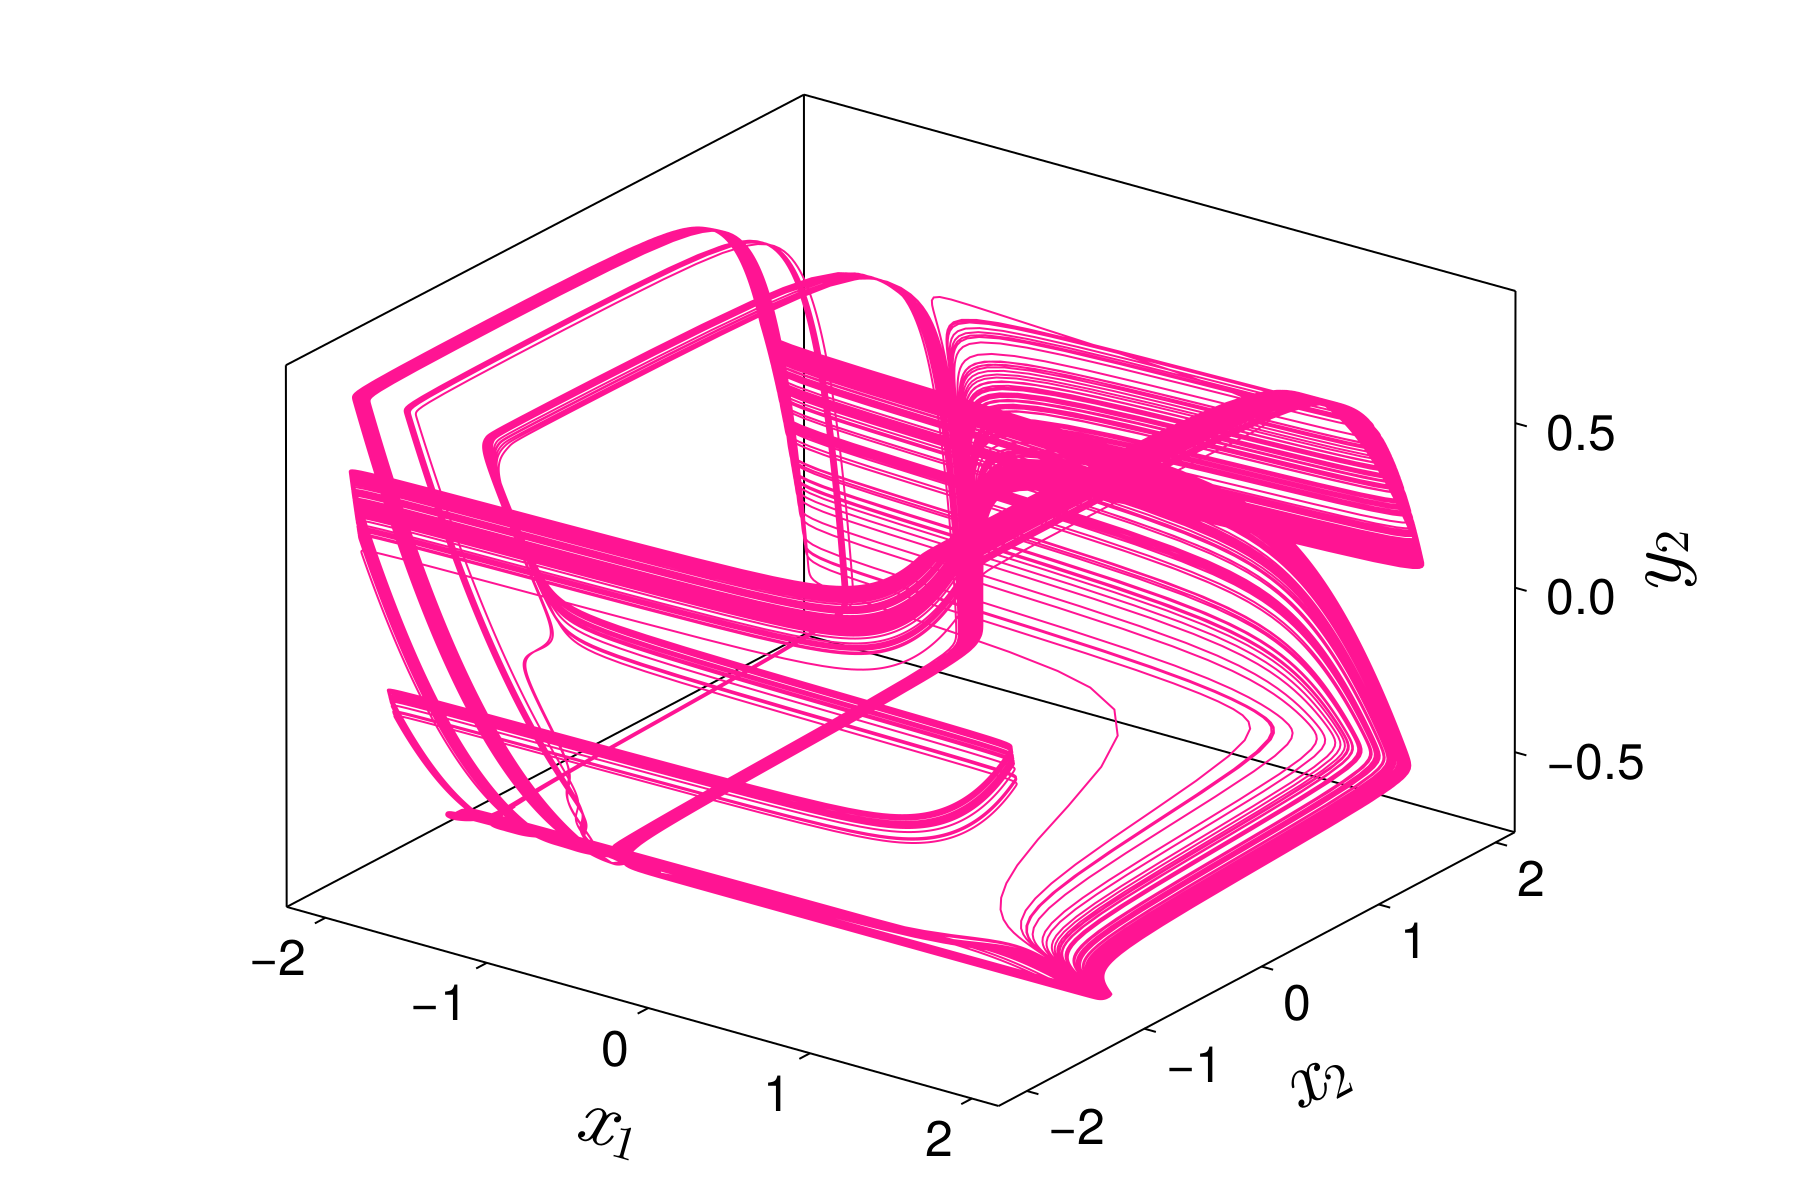

CairoMakie.Screen{IMAGE}


In [104]:
indexx, indexy, indexz = 1, 3, 4
az = -0.3pi
f = Figure(size = (900, 600))
ax3d = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"x_2", zlabel = L"y_2", xlabelsize = labelsize, ylabelsize = labelsize, zlabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
    azimuth = az, xgridvisible = false, ygridvisible = false, zgridvisible = false)

tst1 = get_percent( len_sol, 99)
ted1 = len_sol
lines!(ax3d, sol[indexx, floor(Int64, ted1/2):ted1],
 sol[indexy, floor(Int64, ted1/2):ted1],
  sol[indexz, floor(Int64, ted1/2):ted1], linewidth = lw, color = colorline)

display(f)